# Chavatik Thorarit 6610110066 Sec02

In [1]:
# 1. โปรดตั้งค่า directory ที่ใช้ทำงาน
# 2. สร้างและเปิดใช้งาน environment
import Pkg
Pkg.activate(".")
Pkg.instantiate()
Pkg.add(["Plots", "DataFrames", "CSV", "StatsPlots", "StatsBase", "Random"])
Pkg.status()
using Plots, DataFrames, CSV, StatsPlots, StatsBase, Random

  Activating project at `~/Downloads/SA03`
   Resolving package versions...
  No Changes to `~/Downloads/SA03/Project.toml`
  No Changes to `~/Downloads/SA03/Manifest.toml`


Status `~/Downloads/SA03/Project.toml`
  [336ed68f] CSV v0.10.15
  [a93c6f00] DataFrames v1.7.0
  [91a5bcdd] Plots v1.40.17
  [2913bbd2] StatsBase v0.34.5
  [f3b207a7] StatsPlots v0.15.7
  [9a3f8284] Random v1.11.0


# 1. โหลด dataset

In [2]:
# โหลดข้อมูล personality_dataset (personality_dataset.csv) ลงใน DataFrames
df = DataFrame(CSV.File("personality_dataset.csv")) # โหลด dataset จาก csv
first(df, 5) # แสดง 5 แถวแรกของ DataFrame

Row,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
,Float64?,String3?,Float64?,Float64?,String3?,Float64?,Float64?,String15
1,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
2,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert
3,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert
4,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert
5,3.0,No,9.0,4.0,No,8.0,5.0,Extrovert


# 2. หาค่าเฉลี่ยจำนวนงานสังคมที่เข้าร่วมต่อเดือน Social_event_attendance และแสดง Density Plot

### คำอธิบายฟังก์ชันการกรองและคำนวณค่าเฉลี่ย

**filter()** - ฟังก์ชันสำหรับกรองข้อมูล
- `filter(row -> row.Personality == "Introvert", df)` 
  - `row -> ` คือการสร้างฟังก์ชันแบบไม่ระบุชื่อ (anonymous function)
  - `row.Personality` เข้าถึงคอลัมน์ Personality ของแต่ละแถว
  - `== "Introvert"` ตรวจสอบว่าค่าเท่ากับ 'Introvert' หรือไม่
  - `df` คือ DataFrame ที่ต้องการกรอง

**mean()** - ฟังก์ชันคำนวณค่าเฉลี่ย
- `mean(skipmissing(...))` คำนวณค่าเฉลี่ยโดยข้ามค่า missing
  - `skipmissing()` ฟังก์ชันที่ข้ามค่าที่เป็น missing/null
  - `.Social_event_attendance` เข้าถึงคอลัมน์จำนวนงานสังคมที่เข้าร่วม

**round()** - ฟังก์ชันปัดเศษ
- `round(mean_intro, digits=2)` 
  - `mean_intro` ค่าที่ต้องการปัดเศษ
  - `digits=2` จำนวนทศนิยม 2 ตำแหน่ง

**println()** - แสดงผลพร้อมขึ้นบรรทัดใหม่

In [ ]:
# คัดกรองข้อมูลตามประเภทบุคลิกภาพ
introverts = filter(row -> row.Personality == "Introvert", df) # คัดกรอง Introvert
extroverts = filter(row -> row.Personality == "Extrovert...
println("Extrovert: ", round(mean_extro, digits=2))

ค่าเฉลี่ย Social_event_attendance:
Introvert: 1.78
Extrovert: 6.02


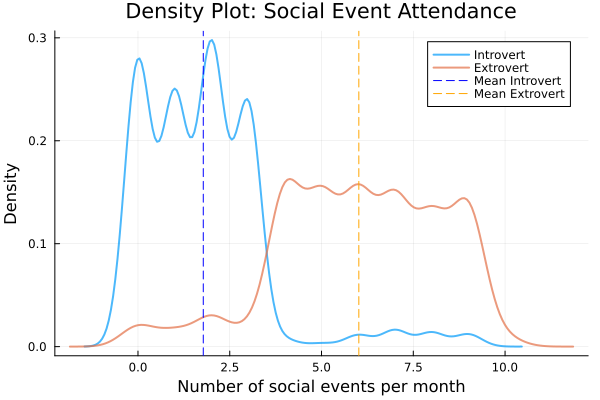

In [ ]:
# สร้าง Density Plot โดยทำการตัดค่า missing value ออกไป
density(collect(skipmissing(introverts.Social_event_attendance)), 
        label="Introvert", linewidth=2, alpha=0.7) # กราฟของ Introvert
density!(collect(skipmissing(extroverts.Social_event_attendance)), 
         label="Extrovert", linewidth=2, alpha=0.7) # กราฟของ Extrovert

title!("Density Plot: Social Event Attendance")
xlabel!("Number of social events per month")
ylabel!("Density")

# เพิ่มเส้นแสดงค่าเฉลี่ย
vline!([mean_intro], label="Mean Introvert", linestyle=:dash, color=:blue) # เส้นเฉลี่ยของ Introvert
vline!([mean_extro], label="Mean Extrovert", linestyle=:dash, color=:orange) # เส้นเฉลี่ยของ Extrovert

# 3. แสดง 2D Scatter Plot ระหว่าง Friends_circle_size และ Time_spent_Alone

In [ ]:
# ลบแถวขาดข้อมูลในคอลัมน์ที่เราต้องการ
df_clean = dropmissing(df, [:Friends_circle_size, :Time_spent_Alone]) # ทำความสะอาดข้อมูล

# แยกกลุ่มข้อมูลตามประเภทบุคลิกภาพ
intro_clean = filter(row -> row.Personality == "Introvert", df_clean) # ข้อมูล Introvert ที่สมบูรณ์
extro_clean = filter(row -> row.Personality == "Extrovert", df_clean) # ข้อมูล Extrovert ที่สมบูรณ์

println("จำนวนข้อมูลหลังตัด missing values:")
println("Total: ", nrow(df_clean))
println("Introvert: ", nrow(intro_clean))
println("Extrovert: ", nrow(extro_clean))

จำนวนข้อมูลหลังตัด missing values:
Total: 2761
Introvert: 1344
Extrovert: 1417


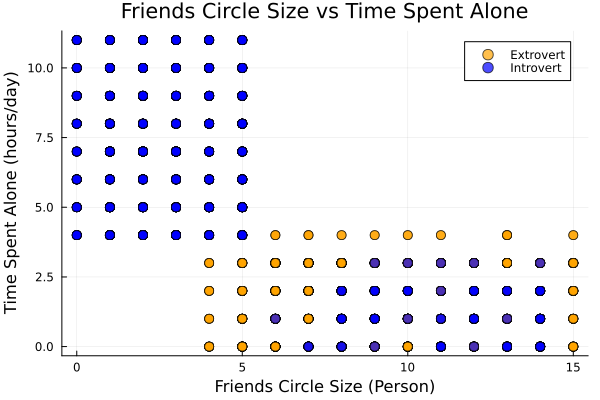

In [ ]:
# สร้าง scatter plot แสดงความสัมพันธ์ระหว่างจำนวนเพื่อนกับเวลาอยู่คนเดียว
scatter(extro_clean.Friends_circle_size, extro_clean.Time_spent_Alone, 
        label="Extrovert", markersize=5, alpha=0.7, color=:orange) # กราฟของ Extrovert
scatter!(intro_clean.Friends_circle_size, intro_clean.Time_spent_Alone, 
         label="Introvert", markersize=5, alpha=0.7, color=:blue) # กราฟของ Introvert

title!("Friends Circle Size vs Time Spent Alone")
xlabel!("Friends Circle Size (Person)")
ylabel!("Time Spent Alone (hours/day)")

# 4. แสดง Box Plot ของ Post_frequency

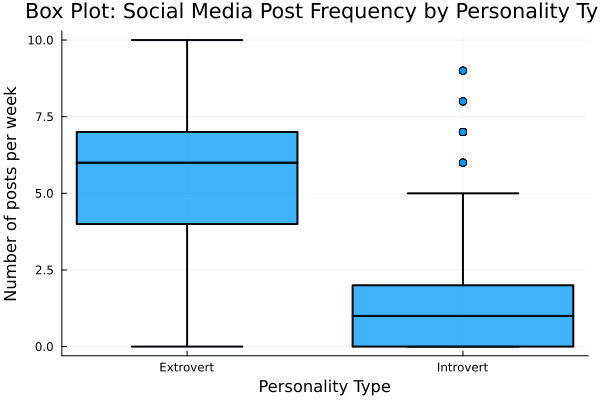

In [ ]:
# สร้าง box plot โดยใช้ StatsPlots
df_posts = dropmissing(df, :Post_frequency) # ลบข้อมูลที่ขาดใน Post_frequency

@df df_posts boxplot(:Personality, :Post_frequency, 
                     label=false, # ไม่แสดง label ในกราฟ (legend)
                     fillalpha=0.75,# ความโปร่งใสของสีที่เติมในกล่อง (0-1, 0.75 = โปร่งใส 25%)
                     linewidth=2) # สร้าง box plot

title!("Box Plot: Social Media Post Frequency by Personality Type")
xlabel!("Personality Type")
ylabel!("Number of posts per week")

In [9]:
# คำนวณและแสดงสถิติ
intro_posts = filter(row -> row.Personality == "Introvert", df_posts).Post_frequency # ข้อมูลโพสต์ของ Introvert
extro_posts = filter(row -> row.Personality == "Extrovert", df_posts).Post_frequency # ข้อมูลโพสต์ของ Extrovert

println("Post Frequency Statistics:")
println("\nIntrovert:")
println("  Mean: ", round(mean(intro_posts), digits=2))
println("  Median: ", median(intro_posts))
println("  Q1: ", quantile(intro_posts, 0.25))
println("  Q3: ", quantile(intro_posts, 0.75))

println("\nExtrovert:")
println("  Mean: ", round(mean(extro_posts), digits=2))
println("  Median: ", median(extro_posts))
println("  Q1: ", quantile(extro_posts, 0.25))
println("  Q3: ", quantile(extro_posts, 0.75))

Post Frequency Statistics:

Introvert:
  Mean: 1.37
  Median: 1.0
  Q1: 0.0
  Q3: 2.0

Extrovert:
  Mean: 5.64
  Median: 6.0
  Q1: 4.0
  Q3: 7.0


# 5. สร้าง DataFrame ใหม่จากการสุ่ม 20 Introvert และ 20 Extrovert

In [10]:
# ตั้งค่าสุ่มเพื่อให้ได้ผลลัพธ์ที่ซ้ำได้
Random.seed!(123) # กำหนดค่า seed ให้กับ random number

# ดึงข้อมูล introverts และ extroverts ทั้งหมด
all_introverts = filter(row -> row.Personality == "Introvert", df) # ข้อมูล Introvert ทั้งหมด
all_extroverts = filter(row -> row.Personality == "Extrovert", df) # ข้อมูล Extrovert ทั้งหมด

# สุ่มเลือก 20 จากแต่ละกลุ่ม
sampled_introverts = all_introverts[sample(1:nrow(all_introverts), 20, replace=false), :] # สุ่มเลือก Introvert
sampled_extroverts = all_extroverts[sample(1:nrow(all_extroverts), 20, replace=false), :] # สุ่มเลือก Extrovert

# รวมข้อมูลที่สุ่มได้ใน DataFrame ใหม่
new_df = vcat(sampled_introverts, sampled_extroverts) # รวมเป็น DataFrame ใหม่

println("New DataFrame created with 40 samples (20 Introvert + 20 Extrovert)") # แสดงผลการสร้าง DataFrame ใหม่

New DataFrame created with 40 samples (20 Introvert + 20 Extrovert)


In [11]:
# แสดงข้อมูลที่สุ่มได้
println("\nIntrovert samples (first 5):") 
println(first(sampled_introverts, 5)) # แสดง 5 แถวแรกของ Introvert

println("\nExtrovert samples (first 5):") 
println(first(sampled_extroverts, 5)) # แสดง 5 แถวแรกของ Extrovert

# ตรวจสอบจำนวน
println("\nVerification:")
println("Total samples: ", nrow(new_df))
println("Introverts: ", count(row -> row.Personality == "Introvert", eachrow(new_df)))
println("Extroverts: ", count(row -> row.Personality == "Extrovert", eachrow(new_df)))

# บันทึกเป็นไฟล์ CSV
CSV.write("sampled_personality_data.csv", new_df) # บันทึกข้อมูลที่สุ่มเป็นไฟล์ CSV
println("\nSampled data saved as 'sampled_personality_data.csv'")


Introvert samples (first 5):
5×8 DataFrame
 Row │ Time_spent_Alone  Stage_fear  Social_event_attendance  Going_outside  Drained_after_socializing  Friends_circle_size  Post_frequency  Personality 
     │ Float64?          String3?    Float64?                 Float64?       String3?                   Float64?             Float64?        String15    
─────┼───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
   1 │              9.0  Yes                             0.0            2.0  Yes                                        4.0             0.0  Introvert
   2 │              4.0  Yes                             0.0      missing    Yes                                        1.0             2.0  Introvert
   3 │              1.0  No                              6.0            5.0  No                                        12.0             6.0  Introvert
   4 │              4.0  Yes             